# DBSCAN Clustering


In [1]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('datasets/fies_df_for_ML.csv')

In [2]:
# Remove ID Columns
id_columns = [
    "rdmd_id",
    "region",
    "province",
    "household_id",
    "recoded_province",
    "psu_recode",
    "raising_factor",
    "final_population_weights",
    'region_with_nir',
    "income_group",
]

In [3]:
# Drop all ID columns and scale the data
X = dataset.drop(id_columns, axis=1)

# Save X to a CSV file
X.to_csv('datasets/fke.csv', index=False)

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Configure DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X_scaled)

DBSCAN(eps=0.3)

In [6]:
labels = dbscan.labels_
unique_labels = np.unique(labels)
print(f"Unique labels: {unique_labels}")

Unique labels: [-1]


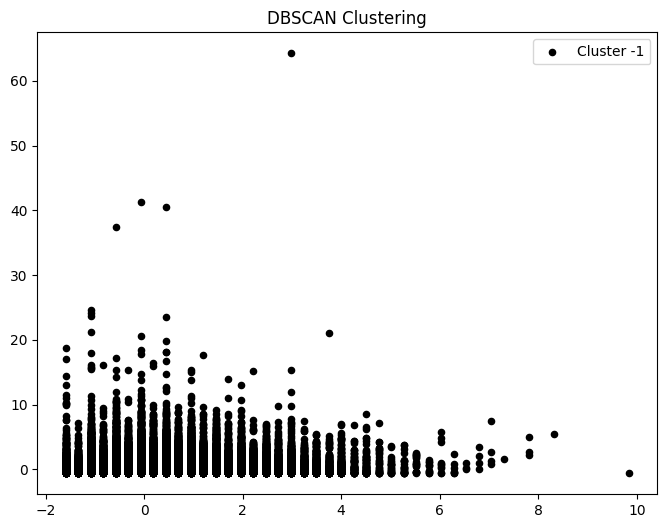

In [8]:
import matplotlib.pyplot as plt
# Plot the clusters
plt.figure(figsize=(8, 6))
for label in unique_labels:
    # Points in this cluster
    cluster_points = X_scaled[labels == label]
    
    # Assign a color; noise points (-1) are black
    color = 'k' if label == -1 else plt.cm.jet(float(label) / max(unique_labels))
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f"Cluster {label}", s=20)

plt.title("DBSCAN Clustering")
plt.legend()
plt.show()
